# Exploratory Analysis of Global Earthquake–Tsunami Events (2001–2022)

This notebook performs an in-depth exploratory data analysis (EDA) of global earthquake and tsunami events using the dataset `earthquake_data_tsunami.csv`. The analysis focuses on understanding trends, magnitude–depth relationships, and characteristics of tsunami-triggering earthquakes.

---

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r'C:\Users\Nikhil\OneDrive\Desktop\earthquake_project\earthquake_data_tsunami.csv', encoding='latin1')
print('Dataset loaded successfully. Shape:', df.shape)
df.head()


Dataset loaded successfully. Shape: (782, 13)


,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [2]:
# Basic info and null check
df.info()
print('\nMissing values per column:\n', df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB

Missing values per column:
 magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64


## 1. Time-Based Analysis
Analysis of earthquake and tsunami events over time (2001–2022).

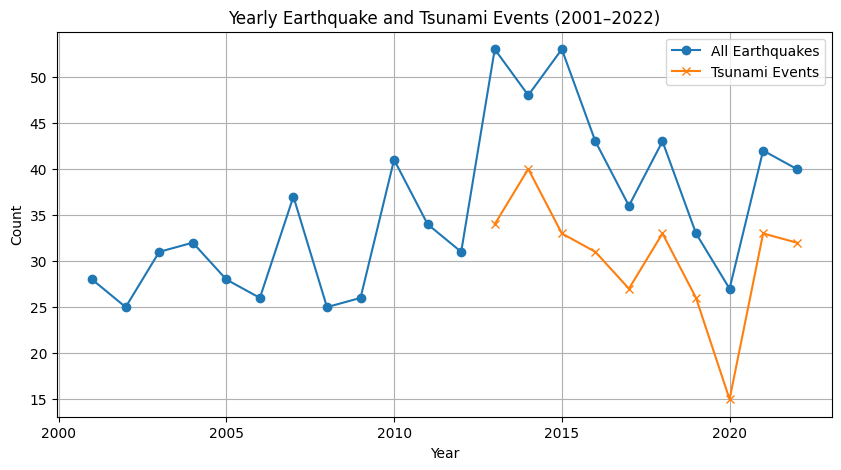

In [3]:
events_per_year = df['Year'].value_counts().sort_index()
tsunami_per_year = df[df['tsunami']==1]['Year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(events_per_year.index, events_per_year.values, marker='o', label='All Earthquakes')
plt.plot(tsunami_per_year.index, tsunami_per_year.values, marker='x', label='Tsunami Events')
plt.title('Yearly Earthquake and Tsunami Events (2001–2022)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

## 2. Magnitude and Depth Analysis

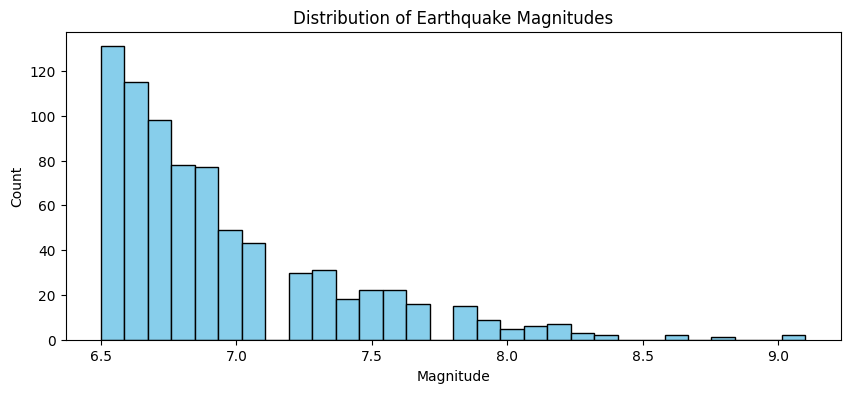

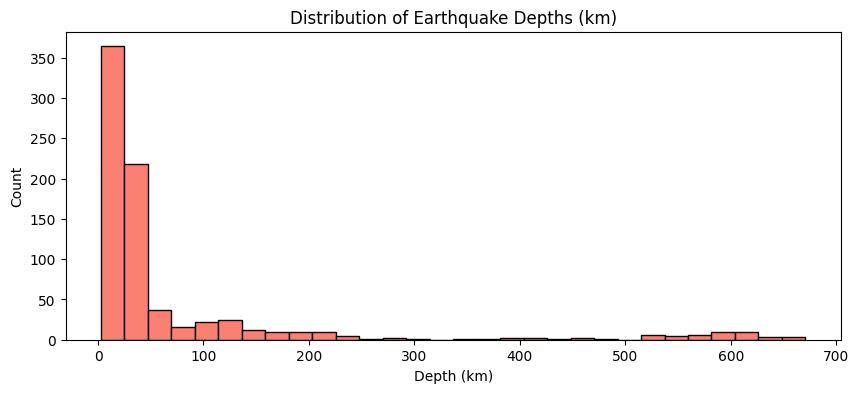

Average Magnitude and Depth:
             magnitude      depth
tsunami                         
No Tsunami   6.942803  69.667356
Tsunami      6.938487  85.656796


In [4]:
plt.figure(figsize=(10,4))
plt.hist(df['magnitude'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,4))
plt.hist(df['depth'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Earthquake Depths (km)')
plt.xlabel('Depth (km)')
plt.ylabel('Count')
plt.show()

summary_stats = df.groupby('tsunami')[['magnitude', 'depth']].mean().rename(index={0: 'No Tsunami', 1: 'Tsunami'})
print('Average Magnitude and Depth:\n', summary_stats)

## 3. Comparison of Tsunami vs Non-Tsunami Events

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_6404\931201261.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['tsunami']==0]['magnitude'], df[df['tsunami']==1]['magnitude']], labels=['No Tsunami', 'Tsunami'])


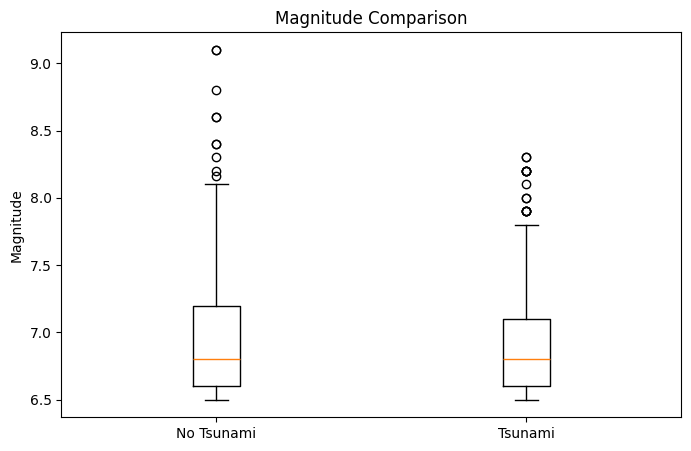

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_6404\931201261.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['tsunami']==0]['depth'], df[df['tsunami']==1]['depth']], labels=['No Tsunami', 'Tsunami'])


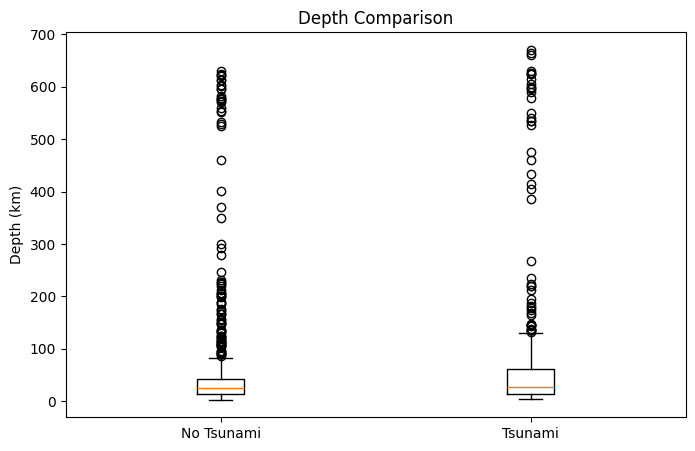

In [5]:
plt.figure(figsize=(8,5))
plt.boxplot([df[df['tsunami']==0]['magnitude'], df[df['tsunami']==1]['magnitude']], labels=['No Tsunami', 'Tsunami'])
plt.title('Magnitude Comparison')
plt.ylabel('Magnitude')
plt.show()

plt.figure(figsize=(8,5))
plt.boxplot([df[df['tsunami']==0]['depth'], df[df['tsunami']==1]['depth']], labels=['No Tsunami', 'Tsunami'])
plt.title('Depth Comparison')
plt.ylabel('Depth (km)')
plt.show()

## 4. Major Earthquakes (Magnitude ≥ 8.0)

In [6]:
major_eq = df[df['magnitude'] >= 8.0].sort_values('magnitude', ascending=False)
major_eq[['Year', 'Month', 'magnitude', 'depth', 'latitude', 'longitude', 'tsunami']]

,Year,Month,magnitude,depth,latitude,longitude,tsunami
668,2004,12,9.10,30.00,3.2950,95.9820,0
476,2011,3,9.10,29.00,38.2970,142.3730,0
517,2010,2,8.80,22.90,-36.1220,-72.8980,0
441,2012,4,8.60,20.00,2.3270,93.0630,0
657,2005,3,8.60,30.00,2.0850,97.1080,0
767,2001,6,8.40,33.00,-16.2650,-73.6410,0
593,2007,9,8.40,34.00,-4.4380,101.3670,0
614,2006,11,8.30,10.00,46.5920,153.2660,0
393,2013,5,8.30,598.10,54.8920,153.2210,1
285,2015,9,8.30,22.44,-31.5729,-71.6744,1


## 5. Geographic Distribution of Earthquakes

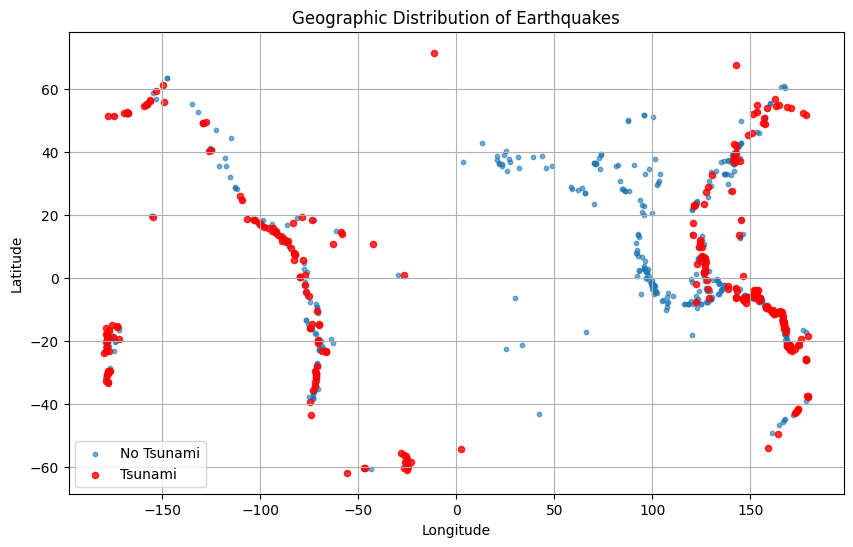

In [7]:
plt.figure(figsize=(10,6))
no_tsunami = df[df['tsunami']==0]
yes_tsunami = df[df['tsunami']==1]

plt.scatter(no_tsunami['longitude'], no_tsunami['latitude'], s=10, alpha=0.6, label='No Tsunami')
plt.scatter(yes_tsunami['longitude'], yes_tsunami['latitude'], s=20, color='red', alpha=0.8, label='Tsunami')
plt.title('Geographic Distribution of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

## 6. Correlation Analysis Between Seismic Features

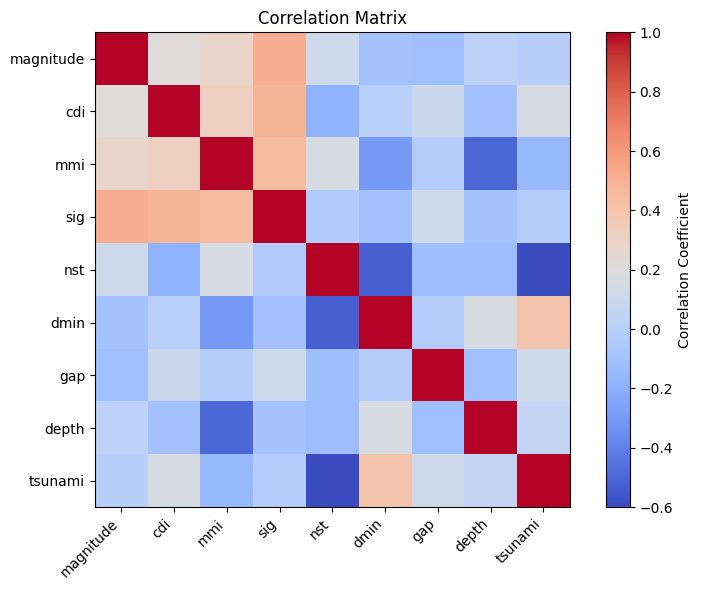

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,tsunami
magnitude,1.000000,0.209549,0.285552,0.515871,0.113114,-0.091403,-0.110626,0.030644,-0.004726
cdi,0.209549,1.000000,0.317937,0.479788,-0.175417,0.006554,0.098143,-0.097891,0.160266
mmi,0.285552,0.317937,1.000000,0.442423,0.160417,-0.299074,-0.015723,-0.504439,-0.147363
sig,0.515871,0.479788,0.442423,1.000000,-0.030100,-0.095318,0.114285,-0.088667,-0.015500
nst,0.113114,-0.175417,0.160417,-0.030100,1.000000,-0.529371,-0.118812,-0.121982,-0.600231
dmin,-0.091403,0.006554,-0.299074,-0.095318,-0.529371,1.000000,-0.021933,0.168546,0.400752
gap,-0.110626,0.098143,-0.015723,0.114285,-0.118812,-0.021933,1.000000,-0.111912,0.116360
depth,0.030644,-0.097891,-0.504439,-0.088667,-0.121982,0.168546,-0.111912,1.000000,0.056814
tsunami,-0.004726,0.160266,-0.147363,-0.015500,-0.600231,0.400752,0.116360,0.056814,1.000000


In [8]:
corr = df[['magnitude','cdi','mmi','sig','nst','dmin','gap','depth','tsunami']].corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

corr

## 7. Magnitude Bins and Tsunami Likelihood

In [9]:
bins = [0,4,5,6,7,8,10]
df['mag_bin'] = pd.cut(df['magnitude'], bins=bins)
mag_bin_summary = df.groupby('mag_bin')['tsunami'].agg(['count','sum'])
mag_bin_summary['perc_tsunami'] = (mag_bin_summary['sum'] / mag_bin_summary['count']) * 100
mag_bin_summary

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_6404\3997359360.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mag_bin_summary = df.groupby('mag_bin')['tsunami'].agg(['count','sum'])


,count,sum,perc_tsunami
mag_bin,,,
"(0, 4]",0,0,NaN
"(4, 5]",0,0,NaN
"(5, 6]",0,0,NaN
"(6, 7]",548,215,39.233577
"(7, 8]",211,81,38.388626
"(8, 10]",23,8,34.782609


## 8. Summary of Key Findings

In [10]:
summary = []
summary.append(f'Total records: {len(df)}')
summary.append(f'Total tsunami events: {df["tsunami"].sum()}')
summary.append(f'Average Magnitude (Tsunami): {df[df["tsunami"]==1]["magnitude"].mean():.2f}')
summary.append(f'Average Depth (Tsunami): {df[df["tsunami"]==1]["depth"].mean():.2f} km')

summary_text = "\n".join(summary)
with open('earthquake_eda_summary.txt','w') as f:
    f.write(summary_text)

print(summary_text)
print("\nSummary saved as earthquake_eda_summary.txt")

Total records: 782
Total tsunami events: 304
Average Magnitude (Tsunami): 6.94
Average Depth (Tsunami): 85.66 km

Summary saved as earthquake_eda_summary.txt
